<a href="https://colab.research.google.com/github/MuhalyAhmadAkin/Car-Price-Prediction-Using-Machine-Learning-Regression-/blob/main/Mama_T_tips.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PROJECT by:  MUHALY AHMAD AKINKUNMI
# Mama T Restaurant – Regression Analysis Project

# Tip Prediction Using Customer and Dining Attributes

## 1. Introduction

This project focuses on predicting the **tip amount** given by customers using a structured dataset containing information about restaurant bills, customer characteristics, and dining context. The dataset includes both numerical and categorical variables that capture different aspects of customer behavior and service conditions.


## 2. Dataset Description

The dataset used in this study consists of the following columns:

- **total_bill**: The total amount of the customer’s bill (in monetary units).
- **tip**: The tip amount given by the customer (target variable).
- **gender**: Gender of the customer (e.g., Male or Female).
- **smoker**: Indicates whether the customer is a smoker (Yes or No).
- **day**: The day of the week on which the transaction occurred.
- **time**: The time of dining (Lunch or Dinner).
- **size**: The number of people in the dining group.

These variables collectively describe both financial and social factors that may influence tipping behavior.

## 3. Problem Statement

The goal of this project is to build a predictive model that accurately estimates the **tip amount** based on the available features. This is formulated as a **supervised regression problem**, where the input variables are customer and dining attributes, and the output variable is the tip amount.




In [ ]:
# import  Lib
import  pandas  as  pd
import  numpy  as  np
import  matplotlib.pyplot  as  plt
import  seaborn  as  sns

In [ ]:
# connect  to  drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# load  the  dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/tips.csv')


In [ ]:
# view  the dataset
df.head()

,total_bill,tip,gender,smoker,day,time,size
0,2125.50,360.79,Male,No,Thur,Lunch,1
1,2727.18,259.42,Female,No,Sun,Dinner,5
2,1066.02,274.68,Female,Yes,Thur,Dinner,4
3,3493.45,337.90,Female,No,Sun,Dinner,1
4,3470.56,567.89,Male,Yes,Sun,Lunch,6


# 1. Data Understanding

In [ ]:
# 1. Data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 744 entries, 0 to 743
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  744 non-null    float64
 1   tip         744 non-null    float64
 2   gender      744 non-null    object 
 3   smoker      744 non-null    object 
 4   day         744 non-null    object 
 5   time        744 non-null    object 
 6   size        744 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 40.8+ KB


In [ ]:
# 1.1 describe()
df.describe()

,total_bill,tip,size
count,744.000000,744.000000,744.000000
mean,2165.006640,325.948091,3.180108
std,954.248806,148.778225,1.532890
min,44.690000,0.000000,1.000000
25%,1499.022500,218.000000,2.000000
50%,2102.610000,320.460000,3.000000
75%,2743.802500,415.562500,4.000000
max,5538.290000,1090.000000,6.000000


## 2. Data Cleaning Process

### 2.1 Remove Irrelevant Data

All columns are relevant, so **no column is removed**.


In [ ]:
### 2.2 Deduplication
df.duplicated().sum()

np.int64(1)

In [ ]:
#2.3 drop  duplication
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
### 2.4 Fix Structural Errors
df['gender'] = df['gender'].str.lower()
df['smoker'] = df['smoker'].str.lower()
df['day'] = df['day'].str.capitalize()
df['time'] = df['time'].str.capitalize()

In [ ]:
df.head()

,total_bill,tip,gender,smoker,day,time,size
0,2125.50,360.79,male,no,Thur,Lunch,1
1,2727.18,259.42,female,no,Sun,Dinner,5
2,1066.02,274.68,female,yes,Thur,Dinner,4
3,3493.45,337.90,female,no,Sun,Dinner,1
4,3470.56,567.89,male,yes,Sun,Lunch,6


In [ ]:
### 2.5 Handle Missing Values
df.isnull().sum()

,0
total_bill,0
tip,0
gender,0
smoker,0
day,0
time,0
size,0


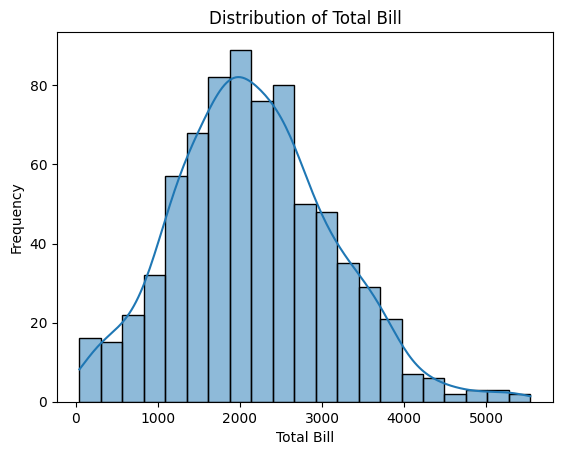

In [ ]:
plt.figure()
sns.histplot(df["total_bill"], kde=True)
plt.title("Distribution of Total Bill")
plt.xlabel("Total Bill")
plt.ylabel("Frequency")
plt.show()




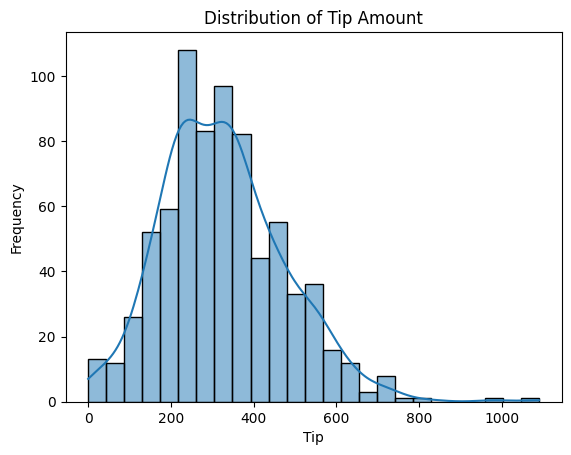

In [ ]:
plt.figure()
sns.histplot(df["tip"], kde=True)
plt.title("Distribution of Tip Amount")
plt.xlabel("Tip")
plt.ylabel("Frequency")
plt.show()

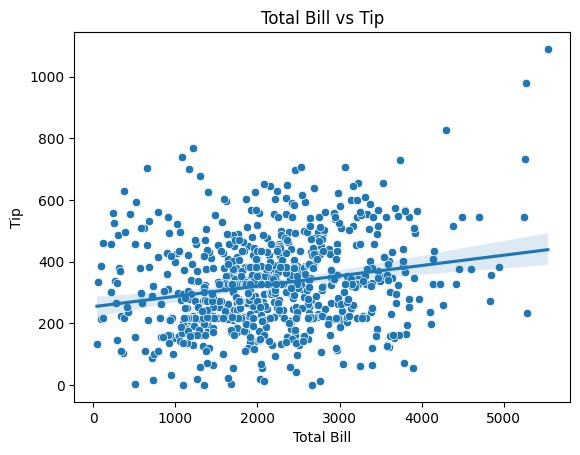

In [ ]:
plt.figure()
sns.scatterplot(x="total_bill", y="tip", data=df)
sns.regplot(x="total_bill", y="tip", data=df, scatter=False)
plt.title("Total Bill vs Tip")
plt.xlabel("Total Bill")
plt.ylabel("Tip")
plt.show()


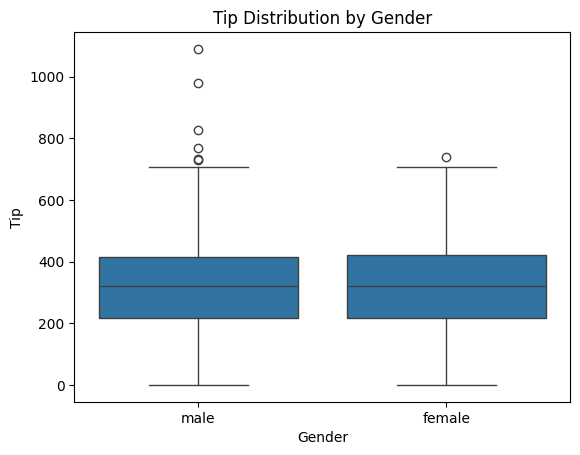

In [ ]:
plt.figure()
sns.boxplot(x="gender", y="tip", data=df)
plt.title("Tip Distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("Tip")
plt.show()

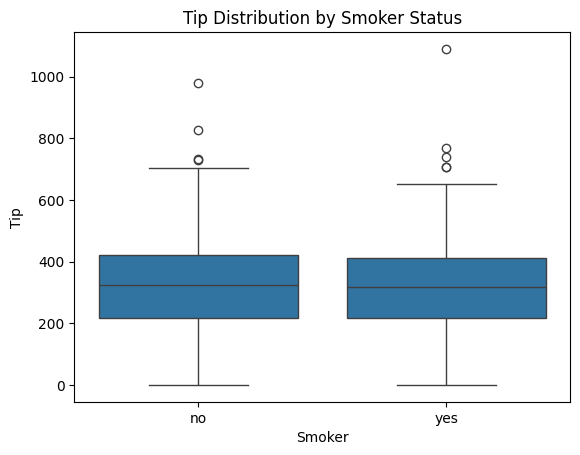

In [ ]:
plt.figure()
sns.boxplot(x="smoker", y="tip", data=df)
plt.title("Tip Distribution by Smoker Status")
plt.xlabel("Smoker")
plt.ylabel("Tip")
plt.show()


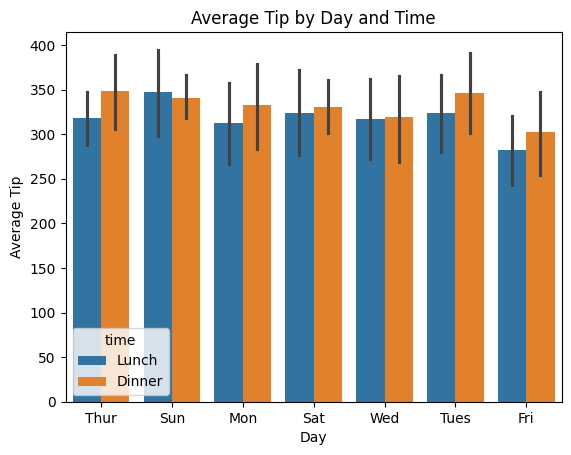

In [ ]:
plt.figure()
sns.barplot(x="day", y="tip", hue="time", data=df)
plt.title("Average Tip by Day and Time")
plt.xlabel("Day")
plt.ylabel("Average Tip")
plt.show()


## 4. Feature Encoding

Machine learning models only understand numbers.


In [ ]:
df.head()

,total_bill,tip,gender,smoker,day,time,size
0,2125.50,360.79,male,no,Thur,Lunch,1
1,2727.18,259.42,female,no,Sun,Dinner,5
2,1066.02,274.68,female,yes,Thur,Dinner,4
3,3493.45,337.90,female,no,Sun,Dinner,1
4,3470.56,567.89,male,yes,Sun,Lunch,6


In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [ ]:
le = LabelEncoder()

for col in ['gender', 'smoker', 'day', 'time']:
    df[col] = le.fit_transform(df[col])

In [ ]:
df.head()

,total_bill,tip,gender,smoker,day,time,size
0,2125.50,360.79,1,0,4,1,1
1,2727.18,259.42,0,0,3,0,5
2,1066.02,274.68,0,1,4,0,4
3,3493.45,337.90,0,0,3,0,1
4,3470.56,567.89,1,1,3,1,6


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
## 9. Feature Scaling
X = df.drop('tip', axis=1)
y = df['tip']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
X

,total_bill,gender,smoker,day,time,size
0,2125.50,1,0,4,1,1
1,2727.18,0,0,3,0,5
2,1066.02,0,1,4,0,4
3,3493.45,0,0,3,0,1
4,3470.56,1,1,3,1,6
...,...,...,...,...,...,...
739,3164.27,1,0,2,0,3
740,2962.62,0,1,2,0,2
741,2471.03,1,1,2,0,2
742,1942.38,1,0,2,0,2


In [ ]:
y

,tip
0,360.79
1,259.42
2,274.68
3,337.90
4,567.89
...,...
739,645.28
740,218.00
741,218.00
742,190.75


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [ ]:
y_train.shape

(594,)

In [ ]:
y_test.shape

(149,)

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

In [ ]:
### 11.1 Linear Regression

lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

In [ ]:
### 11.2 Decision Tree Regressor
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)


In [ ]:
### 11.3 Random Forest Regressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

In [ ]:
### 11.4 Support Vector Regressor (SVR)
svr = SVR()
svr.fit(X_train, y_train)
svr_pred = svr.predict(X_test)

In [ ]:
### 11.5 Gradient Boosting Regressor
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
## 12. Model Evaluation (Simple Explanation)
models = {
    'Linear Regression': lr_pred,
    'Decision Tree': dt_pred,
    'Random Forest': rf_pred,
    'SVR': svr_pred,
    'Gradient Boosting': gb_pred
}

for name, pred in models.items():
    print(name)
    print('MAE:', mean_absolute_error(y_test, pred))
    print('RMSE:', np.sqrt(mean_squared_error(y_test, pred)))
    print('R2 Score:', r2_score(y_test, pred))
    print('----------------------')

Linear Regression
MAE: 126.40375961745056
RMSE: 161.33540862117272
R2 Score: 0.034584440268196404
----------------------
Decision Tree
MAE: 151.5173154362416
RMSE: 196.7416107555404
R2 Score: -0.4356459587960173
----------------------
Random Forest
MAE: 123.89393557046982
RMSE: 157.32584684589963
R2 Score: 0.08197382599019865
----------------------
SVR
MAE: 129.0943654487799
RMSE: 166.25730143192544
R2 Score: -0.02521832794931944
----------------------
Gradient Boosting
MAE: 129.82472129291972
RMSE: 163.3683652852436
R2 Score: 0.010101117123349046
----------------------


In [ ]:
#13. Testing with New Customer Data

new_customer = pd.DataFrame({
    'total_bill': [5000],
    'gender': [1],
    'smoker': [0],
    'day': [2],
    'time': [1],
    'size': [4]
})

new_customer_scaled = scaler.transform(new_customer)
predicted_tip = rf.predict(new_customer_scaled)

print('Predicted Tip:', predicted_tip[0])

Predicted Tip: 473.2234999999999
